In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# DAta Explorations
# Display basic information about the dataset
data.info()

# Display summary statistics of the dataset
data.describe()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Data Clean

# Drop columns with a high number of missing values or irrelevant columns
data = data.drop(['Cabin', 'Ticket'], axis=1)

# Fill missing values in the 'Age' column with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Verify that there are no missing values left
data.isnull().sum()




PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:

# Data Anaylsis
# Calculate the average age of passengers by class
average_age_by_class = data.groupby('Pclass')['Age'].mean()

# Calculate the survival rate by class and gender
survival_rate_by_class_gender = data.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc='mean')

# Display the results
print(average_age_by_class)
print(survival_rate_by_class_gender)


Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


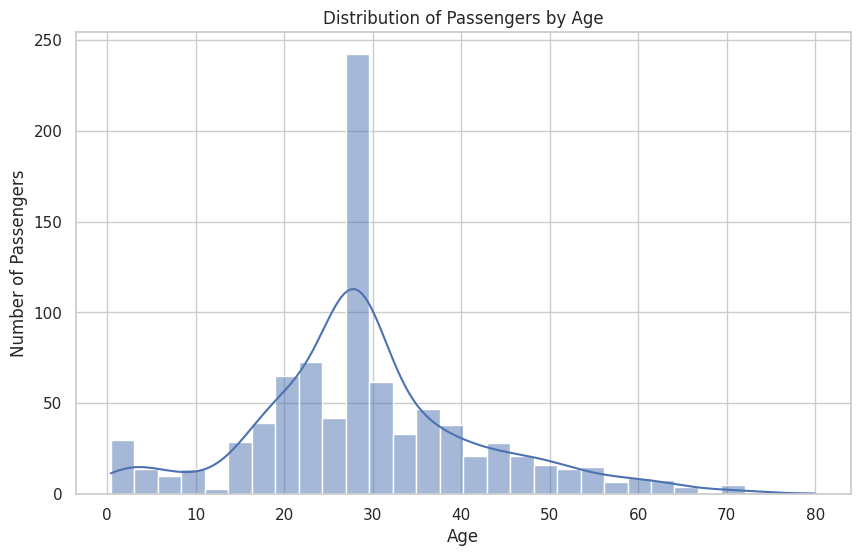

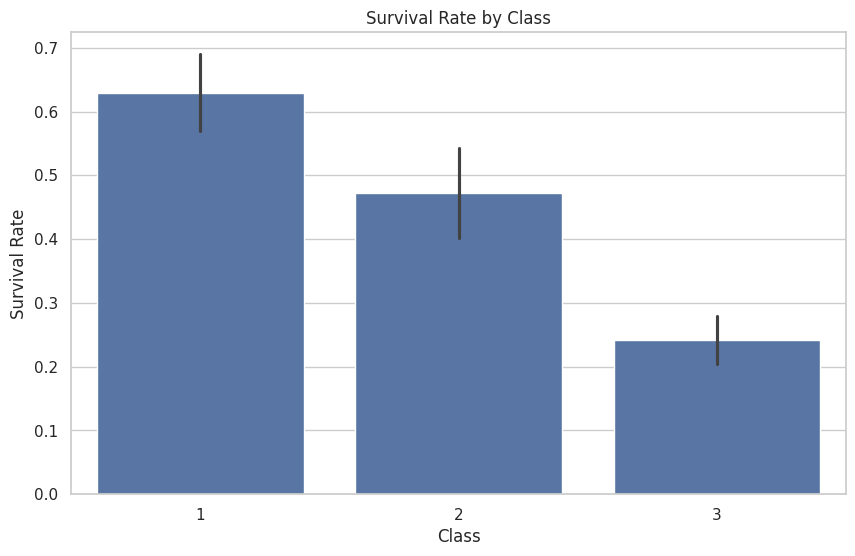

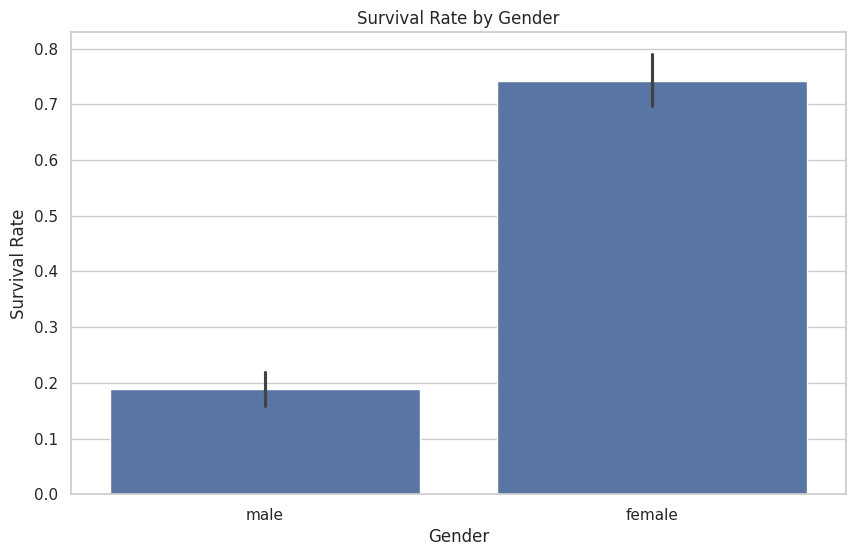

In [ ]:
# Data Visulization
# Set the style of the visualizations
sns.set(style="whitegrid")

# Plot the distribution of passengers by age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

# Plot the survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

# Plot the survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


In [ ]:
# Sql Queries

# Create an SQLite database
conn = sqlite3.connect('titanic.db')
c = conn.cursor()

# Load the data into the SQLite database
data.to_sql('titanic', conn, if_exists='replace', index=False)

# SQL query: Average age of passengers by class
query_avg_age_by_class = """
SELECT Pclass, AVG(Age) as Average_Age
FROM titanic
GROUP BY Pclass
"""
avg_age_by_class_sql = pd.read_sql(query_avg_age_by_class, conn)
print(avg_age_by_class_sql)

# SQL query: Survival rate by class and gender
query_survival_rate_by_class_gender = """
SELECT Pclass, Sex, AVG(Survived) as Survival_Rate
FROM titanic
GROUP BY Pclass, Sex
"""
survival_rate_by_class_gender_sql = pd.read_sql(query_survival_rate_by_class_gender, conn)
print(survival_rate_by_class_gender_sql)

# Close the database connection
conn.close()


   Pclass  Average_Age
0       1    36.812130
1       2    29.765380
2       3    25.932627
   Pclass     Sex  Survival_Rate
0       1  female       0.968085
1       1    male       0.368852
2       2  female       0.921053
3       2    male       0.157407
4       3  female       0.500000
5       3    male       0.135447


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Pas

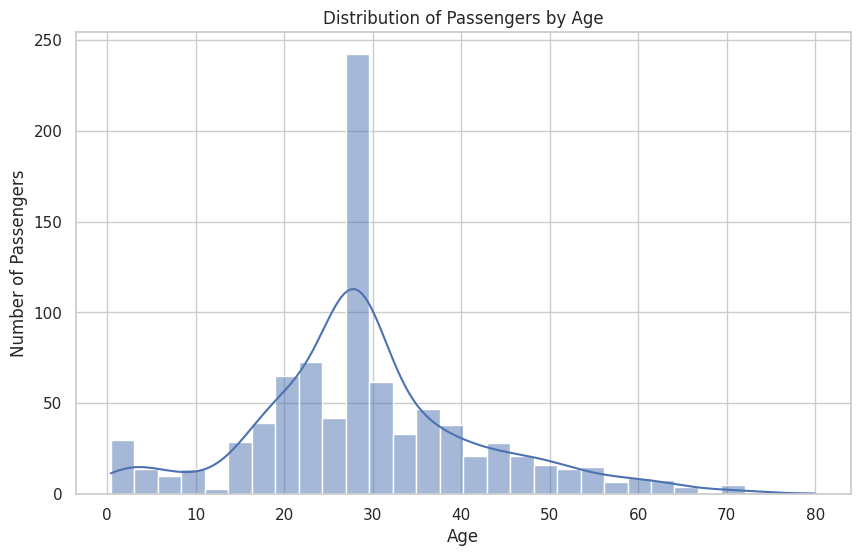

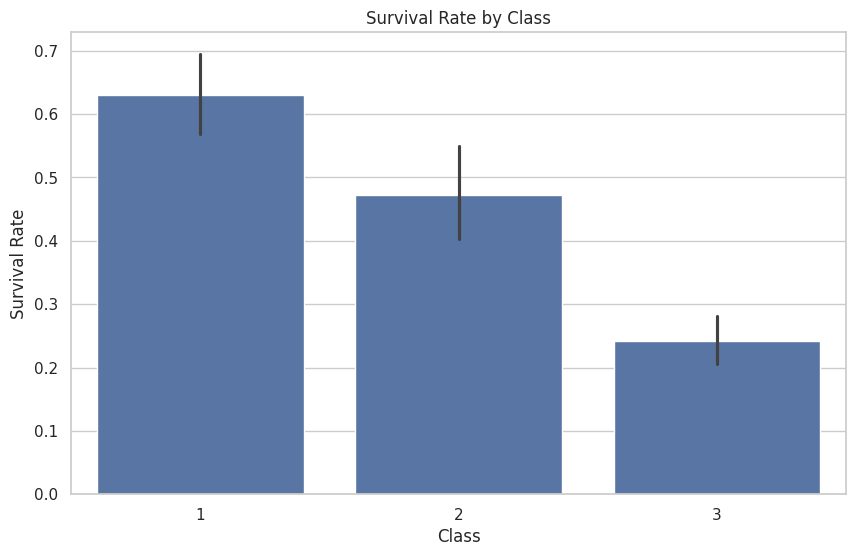

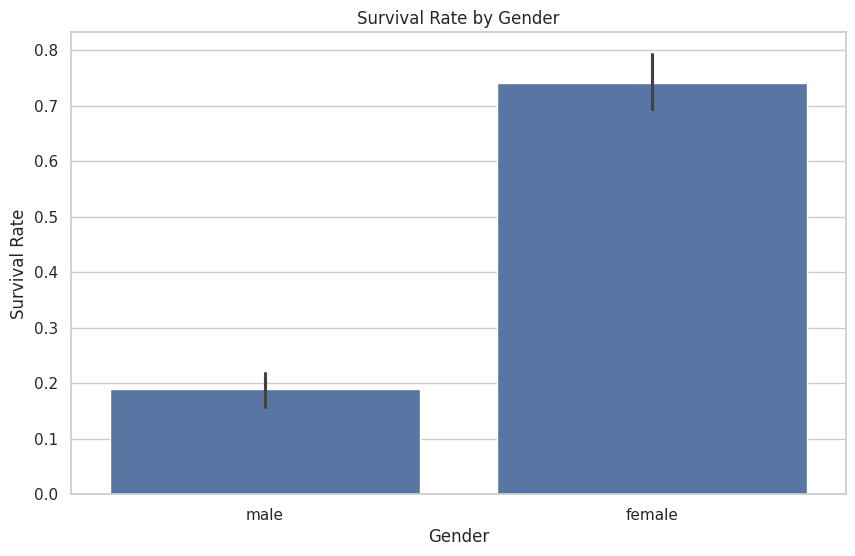

   Pclass  Average_Age
0       1    36.812130
1       2    29.765380
2       3    25.932627
   Pclass     Sex  Survival_Rate
0       1  female       0.968085
1       1    male       0.368852
2       2  female       0.921053
3       2    male       0.157407
4       3  female       0.500000
5       3    male       0.135447


In [ ]:
# python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Data Exploration
data.info()
data.describe()
print(data.isnull().sum())

# Data Cleaning
data = data.drop(['Cabin', 'Ticket'], axis=1)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
print(data.isnull().sum())

# Data Analysis
average_age_by_class = data.groupby('Pclass')['Age'].mean()
survival_rate_by_class_gender = data.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc='mean')
print(average_age_by_class)
print(survival_rate_by_class_gender)

# Data Visualization
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# SQL Queries
conn = sqlite3.connect('titanic.db')
c = conn.cursor()
data.to_sql('titanic', conn, if_exists='replace', index=False)

query_avg_age_by_class = """
SELECT Pclass, AVG(Age) as Average_Age
FROM titanic
GROUP BY Pclass
"""
avg_age_by_class_sql = pd.read_sql(query_avg_age_by_class, conn)
print(avg_age_by_class_sql)

query_survival_rate_by_class_gender = """
SELECT Pclass, Sex, AVG(Survived) as Survival_Rate
FROM titanic
GROUP BY Pclass, Sex
"""
survival_rate_by_class_gender_sql = pd.read_sql(query_survival_rate_by_class_gender, conn)
print(survival_rate_by_class_gender_sql)

conn.close()
